In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tweets_data_path = 'twitter_data.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [3]:
print len(tweets_data)
# print (tweets_data)

79359


In [4]:
tweets_data[0]

{u'contributors': None,
 u'coordinates': None,
 u'created_at': u'Thu Jun 14 15:45:33 +0000 2018',
 u'entities': {u'hashtags': [{u'indices': [101, 108], u'text': u'RUSKSA'},
   {u'indices': [109, 118], u'text': u'WorldCup'},
   {u'indices': [119, 123], u'text': u'RUS'},
   {u'indices': [124, 128], u'text': u'KSA'}],
  u'symbols': [],
  u'urls': [],
  u'user_mentions': []},
 u'favorite_count': 0,
 u'favorited': False,
 u'filter_level': u'low',
 u'geo': None,
 u'id': 1007287938193842177L,
 u'id_str': u'1007287938193842177',
 u'in_reply_to_screen_name': None,
 u'in_reply_to_status_id': None,
 u'in_reply_to_status_id_str': None,
 u'in_reply_to_user_id': None,
 u'in_reply_to_user_id_str': None,
 u'is_quote_status': False,
 u'lang': u'ja',
 u'place': None,
 u'quote_count': 0,
 u'reply_count': 0,
 u'retweet_count': 0,
 u'retweeted': False,
 u'source': u'<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 u'text': u'\u30ed\u30b7\u30a2\u306e\u901f\u653b\u304b\u3089\u30c1\u30a7\

In [5]:
type(tweets_data[0])

dict

In [6]:
len(tweets_data[0].keys())

27

In [7]:
tweets_data[0].keys() 

[u'quote_count',
 u'contributors',
 u'truncated',
 u'text',
 u'is_quote_status',
 u'in_reply_to_status_id',
 u'reply_count',
 u'id',
 u'favorite_count',
 u'source',
 u'retweeted',
 u'coordinates',
 u'timestamp_ms',
 u'entities',
 u'in_reply_to_screen_name',
 u'id_str',
 u'retweet_count',
 u'in_reply_to_user_id',
 u'favorited',
 u'user',
 u'geo',
 u'in_reply_to_user_id_str',
 u'lang',
 u'created_at',
 u'filter_level',
 u'in_reply_to_status_id_str',
 u'place']

In [8]:
tweets_data[0]['user'].keys() 

[u'follow_request_sent',
 u'profile_use_background_image',
 u'default_profile_image',
 u'id',
 u'default_profile',
 u'verified',
 u'profile_image_url_https',
 u'profile_sidebar_fill_color',
 u'profile_text_color',
 u'followers_count',
 u'profile_sidebar_border_color',
 u'id_str',
 u'profile_background_color',
 u'listed_count',
 u'profile_background_image_url_https',
 u'utc_offset',
 u'statuses_count',
 u'description',
 u'friends_count',
 u'location',
 u'profile_link_color',
 u'profile_image_url',
 u'following',
 u'geo_enabled',
 u'profile_banner_url',
 u'profile_background_image_url',
 u'name',
 u'lang',
 u'profile_background_tile',
 u'favourites_count',
 u'screen_name',
 u'notifications',
 u'url',
 u'created_at',
 u'contributors_enabled',
 u'time_zone',
 u'protected',
 u'translator_type',
 u'is_translator']

In [9]:
tweet_info = ['quote_count','contributors','truncated',\
              'text','reply_count','id','favorite_count',\
              'retweeted','timestamp_ms','retweet_count',\
              'favorited','geo','lang','created_at','place','filter_level']

In [10]:
tweet_info = pd.DataFrame()
tweet_info['quote_count'] = map(lambda tweet:tweet['quote_count'] if 'quote_count' in tweet else ' ', tweets_data)
tweet_info['contributors'] = map(lambda tweet:tweet['contributors'] if 'contributors' in tweet else ' ', tweets_data)
tweet_info['truncated'] = map(lambda tweet:tweet['truncated'] if 'truncated' in tweet else ' ', tweets_data)
tweet_info['text'] = map(lambda tweet:tweet['text'] if 'text' in tweet else ' ', tweets_data)
tweet_info['reply_count'] = map(lambda tweet:tweet['reply_count'] if 'reply_count' in tweet else ' ', tweets_data)
tweet_info['id'] = map(lambda tweet:tweet['id'] if 'id' in tweet else ' ', tweets_data)
tweet_info['favorite_count'] = map(lambda tweet:tweet['favorite_count'] if 'favorite_count' in tweet else ' ', tweets_data)
tweet_info['retweeted'] = map(lambda tweet:tweet['retweeted'] if 'retweeted' in tweet else ' ', tweets_data)
tweet_info['timestamp_ms'] = map(lambda tweet:tweet['timestamp_ms'] if 'timestamp_ms' in tweet else ' ', tweets_data)
tweet_info['retweet_count'] = map(lambda tweet:tweet['retweet_count'] if 'retweet_count' in tweet else ' ', tweets_data)
tweet_info['favorited'] = map(lambda tweet:tweet['favorited'] if 'favorited' in tweet else ' ', tweets_data)
tweet_info['geo'] = map(lambda tweet:tweet['geo'] if 'geo' in tweet else ' ', tweets_data)
tweet_info['language'] = map(lambda tweet:tweet['lang'] if 'lang' in tweet else ' ', tweets_data)
tweet_info['created_at'] = map(lambda tweet:tweet['created_at'] if 'created_at' in tweet else ' ', tweets_data)
tweet_info['place'] = map(lambda tweet:tweet['place'] if 'place' in tweet else ' ', tweets_data)
tweet_info['place'].fillna(0,inplace=True)
tweet_info['place'].replace({' ':0},inplace=True)
tweet_info['country_code'] = tweet_info['place'].apply(lambda x: x.values()[0] if x != 0 and x.keys()[0] == 'country_code' else ' ')
tweet_info['country'] = tweet_info['place'].apply(lambda x: x.values()[2] if x != 0 and x.keys()[2] == 'country' else ' ')
tweet_info['full_name'] = tweet_info['place'].apply(lambda x: x.values()[5] if x != 0 and x.keys()[5] == 'full_name' else ' ')
tweet_info['city'] = tweet_info['place'].apply(lambda x: x.values()[8] if x != 0 and x.keys()[8] == 'name' else ' ')
tweet_info.drop('place',axis=1,inplace=True)
tweet_info['filter_level'] = map(lambda tweet:tweet['filter_level'] if 'filter_level' in tweet else ' ', tweets_data)

In [11]:
user_info = ['follow_request_sent','id','verified','followers_count',\
             'listed_count','statuses_count','friends_count','following',\
             'geo_enabled','lang','name','favourites_count','notifications',\
             'created_at','contributors_enabled','time_zone','protected',\
             'translator_type','is_translator']

In [12]:
user_info = pd.DataFrame()
user_info['follow_request_sent'] = map(lambda tweet:tweet['user']['follow_request_sent'] if 'follow_request_sent' in tweet else ' ', tweets_data)
user_info['id'] = map(lambda tweet:tweet['user']['id'] if 'id' in tweet else ' ', tweets_data)
user_info['verified'] = map(lambda tweet:tweet['user']['verified'] if 'verified' in tweet else ' ', tweets_data)
user_info['followers_count'] = map(lambda tweet:tweet['user']['followers_count'] if 'followers_count' in tweet else ' ', tweets_data)
user_info['listed_count'] = map(lambda tweet:tweet['user']['listed_count'] if 'listed_count' in tweet else ' ', tweets_data)
user_info['statuses_count'] = map(lambda tweet:tweet['user']['statuses_count'] if 'statuses_count' in tweet else ' ', tweets_data)
user_info['friends_count'] = map(lambda tweet:tweet['user']['friends_count'] if 'favorite_count' in tweet else ' ', tweets_data)
user_info['following'] = map(lambda tweet:tweet['user']['following'] if 'following' in tweet else ' ', tweets_data)
user_info['geo_enabled'] = map(lambda tweet:tweet['user']['geo_enabled'] if 'geo_enabled' in tweet else ' ', tweets_data)
user_info['lang'] = map(lambda tweet:tweet['user']['lang'] if 'lang' in tweet else ' ', tweets_data)
user_info['user_name'] = map(lambda tweet:tweet['user']['name'] if 'name' in tweet else ' ', tweets_data)
user_info['favourites_count'] = map(lambda tweet:tweet['user']['favourites_count'] if 'favourites_count' in tweet else ' ', tweets_data)
user_info['notifications'] = map(lambda tweet:tweet['user']['notifications'] if 'notifications' in tweet else ' ', tweets_data)
user_info['created_at'] = map(lambda tweet:tweet['user']['created_at'] if 'created_at' in tweet else ' ', tweets_data)
user_info['contributors_enabled'] = map(lambda tweet:tweet['user']['contributors_enabled'] if 'contributors_enabled' in tweet else ' ', tweets_data)
user_info['time_zone'] = map(lambda tweet:tweet['user']['time_zone'] if 'time_zone' in tweet else ' ', tweets_data)
user_info['protected'] = map(lambda tweet:tweet['user']['protected'] if 'protected' in tweet else ' ', tweets_data)
user_info['translator_type'] = map(lambda tweet:tweet['user']['translator_type'] if 'translator_type' in tweet else ' ', tweets_data)
user_info['is_translator'] = map(lambda tweet:tweet['user']['is_translator'] if 'is_translator' in tweet else ' ', tweets_data)

In [13]:
import numpy as np
tweet_info['no'] = np.arange(1,79360)
user_info['no'] = np.arange(1,79360)

In [14]:
data = tweet_info.merge(user_info,on='no')
data.drop('no',axis=1,inplace=True)

In [15]:
data.shape

(79359, 38)

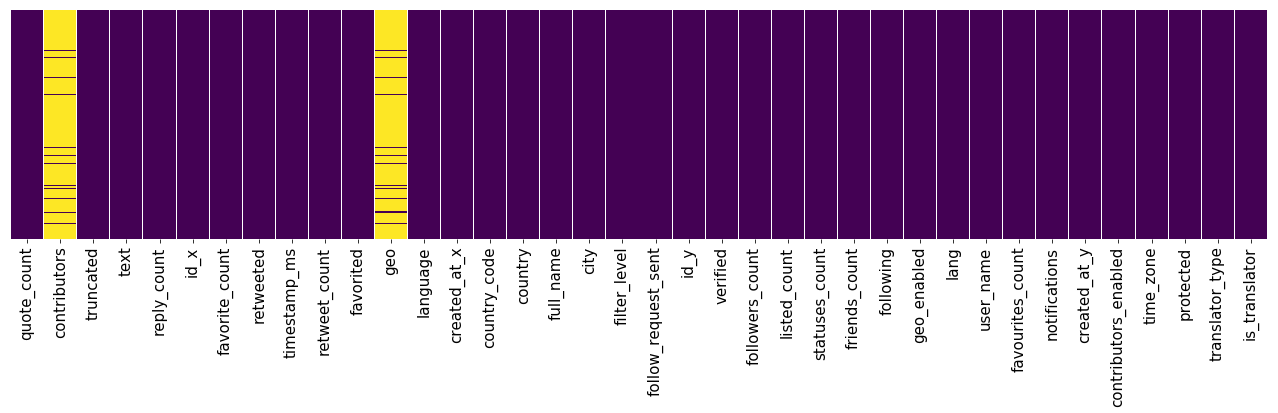

In [16]:
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(18,6))
plt.rc('font',size=15)
sns.heatmap(data.isnull(),cmap='viridis',yticklabels=False,cbar=False)
plt.tight_layout();

- Since 'contributors'and 'geo' has many missing values,drop them

In [17]:
data.drop(['contributors','geo','geo_enabled'],axis=1,inplace=True)

- dropping 'id' features and renaming 'created_at' features

In [18]:
data.drop(['id_x','id_y','lang'],axis=1,inplace=True)
data.rename({'created_at_x':'tweet_created','created_at_y':'account_created'},axis=1,inplace=True)

In [19]:
data.isnull().sum()

quote_count             0
truncated               0
text                    0
reply_count             0
favorite_count          0
retweeted               0
timestamp_ms            0
retweet_count           0
favorited               0
language                0
tweet_created           0
country_code            0
country                 0
full_name               0
city                    0
filter_level            0
follow_request_sent     0
verified                0
followers_count         0
listed_count            0
statuses_count          0
friends_count           0
following               0
user_name               0
favourites_count        0
notifications           0
account_created         0
contributors_enabled    0
time_zone               0
protected               0
translator_type         0
is_translator           0
dtype: int64

In [20]:
print 'shape:{}'.format(data.shape)
# data.head()

shape:(79359, 32)


In [21]:
data['language'].value_counts()[:11]

en     53758
es      5087
        4046
ja      3945
und     2257
ar      1652
fr      1501
pt      1285
th       957
in       931
ko       591
Name: language, dtype: int64

In [22]:
eng_tweets = data[data['language'] == 'en']

In [23]:
print 'Shape:{}'.format(eng_tweets.shape)
# eng_tweets.head(2)

Shape:(53758, 32)


In [24]:
dropping_cols_list = ['quote_count','reply_count','favorite_count','retweeted',\
            'timestamp_ms','retweet_count','favorited','user_name','favourites_count',\
            'notifications','contributors_enabled','time_zone','verified','protected',\
            'translator_type','followers_count','is_translator','filter_level',\
            'follow_request_sent','listed_count','statuses_count','following','language','full_name']

In [25]:
import warnings
warnings.filterwarnings("ignore")

eng_tweets.drop(dropping_cols_list,axis=1,inplace=True)
eng_tweets.shape

(53758, 8)

In [26]:
def filter(df):
    for i in df.columns:
        df[i].replace({' ':'unknown'},inplace=True)
    return df    

eng_tweets = filter(eng_tweets)
# eng_tweets.head()

In [27]:
eng_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53758 entries, 21 to 79358
Data columns (total 8 columns):
truncated          53758 non-null bool
text               53758 non-null object
tweet_created      53758 non-null object
country_code       53758 non-null object
country            53758 non-null object
city               53758 non-null object
friends_count      53758 non-null int64
account_created    53758 non-null object
dtypes: bool(1), int64(1), object(6)
memory usage: 3.3+ MB


In [28]:
eng_tweets[['tweet_created','account_created']].head()

,tweet_created,account_created
21,Wed Jun 13 18:45:46 +0000 2018,Mon Oct 24 15:36:43 +0000 2016
30,Wed Jun 13 18:46:49 +0000 2018,Sat Nov 24 09:59:31 +0000 2012
42,Thu Jun 14 06:30:56 +0000 2018,Sun Mar 22 12:32:25 +0000 2009
44,Thu Jun 14 06:30:56 +0000 2018,Fri Jun 27 03:10:50 +0000 2014
45,Thu Jun 14 06:30:56 +0000 2018,Fri Nov 01 14:49:53 +0000 2013


In [29]:
import datetime as dt
eng_tweets = eng_tweets.reset_index()

In [30]:
def extract(df):
    df['account_created_day'] = df['account_created'].apply(lambda x: x[:3])
    df['account_created_date'] = df['account_created'].apply(lambda x: x[4:10])
    df['tweet_created_day'] = df['tweet_created'].apply(lambda x: x[:3])
    df['tweet_created_date'] = df['tweet_created'].apply(lambda x: x[4:10])  
    return df
eng_tweets = extract(eng_tweets)
# eng_tweets.head()

In [31]:
eng_tweets['account_created']= pd.to_datetime(eng_tweets['account_created'])
eng_tweets['tweet_created']= pd.to_datetime(eng_tweets['tweet_created'])

In [32]:
import time
def get_time(df):
    df['account_created_year'] = df['account_created'].apply(lambda x: x.strftime('%Y'))
    df['account_created_time'] = df['account_created'].apply(lambda x: x.strftime('%H:%M:%S'))
    df['tweet_created_time'] = df['tweet_created'].apply(lambda x: x.strftime('%H:%M:%S'))
    df['account_created_time_slot'] = df['account_created'].apply(lambda x: x.strftime('%H'))
    df['tweet_created_time_slot'] = df['tweet_created'].apply(lambda x: x.strftime('%H'))
    return df

In [33]:
eng_tweets = get_time(eng_tweets)
eng_tweets.drop(['account_created','tweet_created'],inplace=True,axis=1)
eng_tweets = eng_tweets.reset_index()

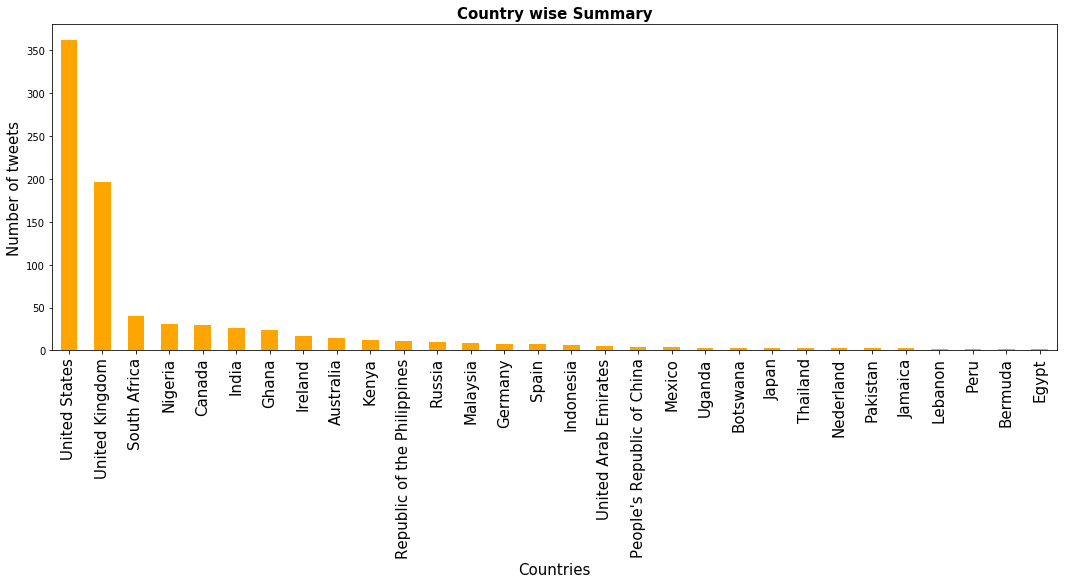

In [34]:
tweets_by_countries = eng_tweets['country'].value_counts()

fig, ax = plt.subplots()
fig.set_size_inches(h=6,w=18)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Country wise Summary', fontsize=15, fontweight='bold')
tweets_by_countries[1:31].plot(ax=ax, kind='bar', color='orange')
plt.savefig('tweets_by_countries.jpg',bbox_inches='tight', pad_inches=0.3);

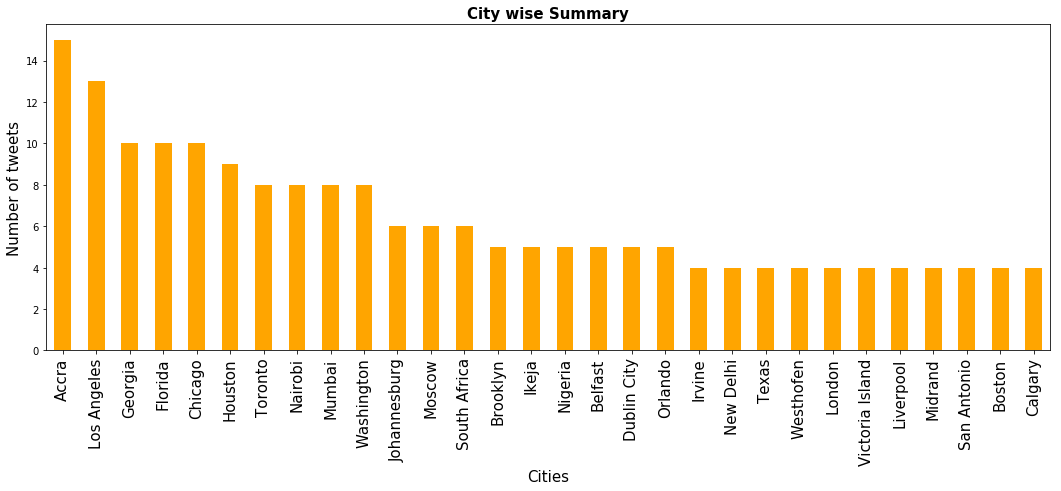

In [35]:
tweets_by_cities = eng_tweets['city'].value_counts()

fig, ax = plt.subplots()
fig.set_size_inches(h=6,w=18)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Cities', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('City wise Summary', fontsize=15, fontweight='bold')
tweets_by_cities[1:31].plot(ax=ax, kind='bar', color='orange')
plt.savefig('tweets_by_cities.jpg',bbox_inches='tight', pad_inches=0.3);

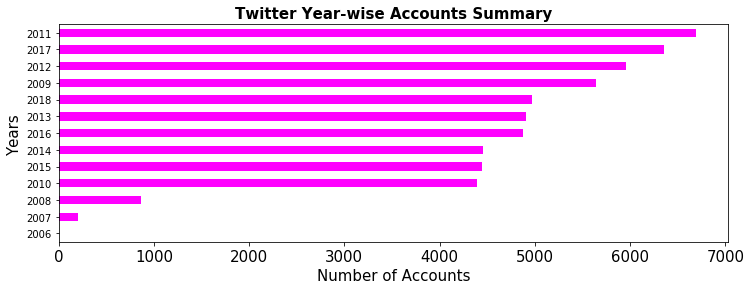

In [36]:
number_of_accounts_yearwise = eng_tweets['account_created_year'].value_counts(ascending=True)

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_ylabel('Years', fontsize=15)
ax.set_xlabel('Number of Accounts' , fontsize=15)
ax.set_title('Twitter Year-wise Accounts Summary', fontsize=15, fontweight='bold')
number_of_accounts_yearwise[:].plot(ax=ax, kind='barh', color='magenta',figsize=(12,4))
plt.savefig('number_of_accounts_yearwise.jpg',bbox_inches='tight', pad_inches=0.3);

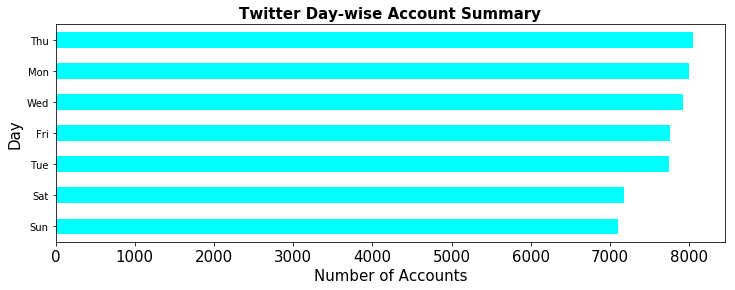

In [37]:
number_of_accounts_daywise = eng_tweets['account_created_day'].value_counts(ascending=True)

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_ylabel('Day', fontsize=15)
ax.set_xlabel('Number of Accounts' , fontsize=15)
ax.set_title('Twitter Day-wise Account Summary', fontsize=15, fontweight='bold')
number_of_accounts_daywise[:].plot(ax=ax, kind='barh', color='cyan',figsize=(12,4))
plt.savefig('number_of_accounts_daywise.jpg',bbox_inches='tight', pad_inches=0.3);

In [38]:
# tweet time
eng_tweets['account_created_time_slot'] = eng_tweets['account_created_time_slot'].astype('int')
eng_tweets['tweet_created_time_slot'] = eng_tweets['tweet_created_time_slot'].astype('int')

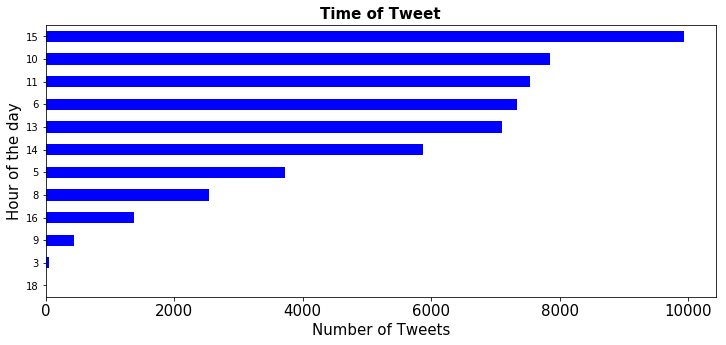

In [39]:
timing_of_tweet = eng_tweets['tweet_created_time_slot'].value_counts(ascending=True)

fig, ax = plt.subplots()

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_ylabel('Hour of the day', fontsize=15)
ax.set_xlabel('Number of Tweets' , fontsize=15)
ax.set_title('Time of Tweet', fontsize=15, fontweight='bold')
timing_of_tweet[:].plot(ax=ax, kind='barh', color='blue',figsize=(12,5))
plt.savefig('timing_of_tweet.jpg',bbox_inches='tight', pad_inches=0.3);

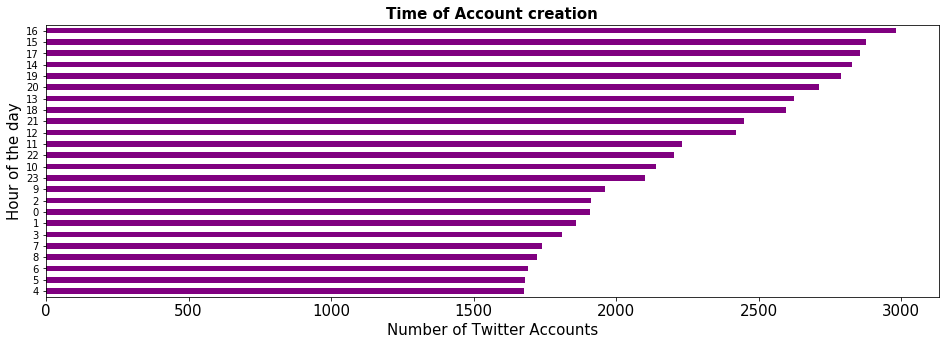

In [40]:
timing_of_account_creation = eng_tweets['account_created_time_slot'].value_counts(ascending=True)

fig, ax = plt.subplots()
fig.set_size_inches(h=6,w=18)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_ylabel('Hour of the day', fontsize=15)
ax.set_xlabel('Number of Twitter Accounts' , fontsize=15)
ax.set_title('Time of Account creation', fontsize=15, fontweight='bold')
timing_of_account_creation[:].plot(ax=ax, kind='barh', color='purple',figsize=(16,5))
plt.savefig('timing_of_tweet.jpg',bbox_inches='tight', pad_inches=0.3);

In [41]:
eng_tweets['account_created_time_slot'] = eng_tweets['account_created_time_slot'].apply(lambda x: 'morning' if x in range(4,12) \
                                              else 'afternoon' if x in range(12,18) \
                                              else 'evening'if x in range(17,21) else 'night')

eng_tweets['tweet_created_time_slot'] = eng_tweets['tweet_created_time_slot'].apply(lambda x: 'morning' if x in range(4,12) \
                                              else 'afternoon' if x in range(12,18) \
                                              else 'evening'if x in range(17,21) else 'night')

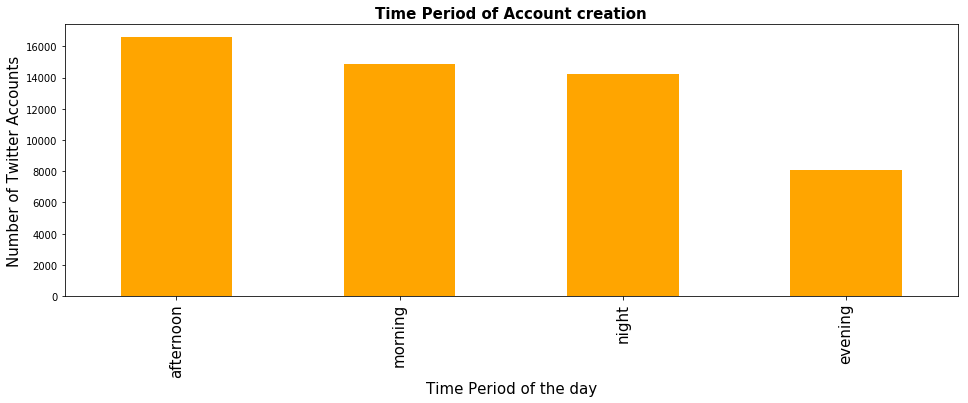

In [42]:
time_period_of_account_creation = eng_tweets['account_created_time_slot'].value_counts(ascending=False)

fig, ax = plt.subplots()

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Time Period of the day', fontsize=15)
ax.set_ylabel('Number of Twitter Accounts' , fontsize=15)
ax.set_title('Time Period of Account creation', fontsize=15, fontweight='bold')
time_period_of_account_creation[:].plot(ax=ax, kind='bar', color='orange',figsize=(16,5))
plt.savefig('time_period_of_account_creation.jpg',bbox_inches='tight', pad_inches=0.3);

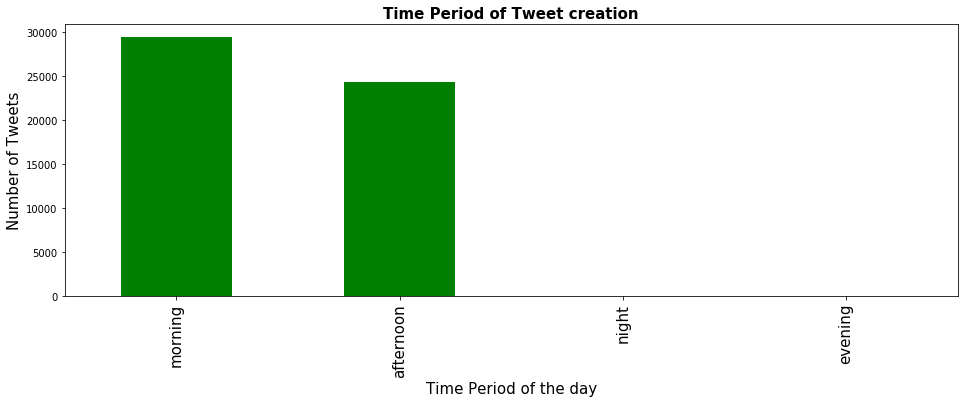

In [43]:
time_period_of_tweet_creation = eng_tweets['tweet_created_time_slot'].value_counts(ascending=False)

fig, ax = plt.subplots()

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Time Period of the day', fontsize=15)
ax.set_ylabel('Number of Tweets' , fontsize=15)
ax.set_title('Time Period of Tweet creation', fontsize=15, fontweight='bold')
time_period_of_tweet_creation[:].plot(ax=ax, kind='bar', color='green',figsize=(16,5))
plt.savefig('time_period_of_tweet_creation.jpg',bbox_inches='tight', pad_inches=0.3);

In [45]:
eng_tweets.columns
# 

Index([u'level_0', u'index', u'truncated', u'text', u'country_code',
       u'country', u'city', u'friends_count', u'account_created_day',
       u'account_created_date', u'tweet_created_day', u'tweet_created_date',
       u'account_created_year', u'account_created_time', u'tweet_created_time',
       u'account_created_time_slot', u'tweet_created_time_slot'],
      dtype='object')

In [46]:
eng_tweets.drop(['level_0','index'],axis=1,inplace=True)
eng_tweets.dropna()
eng_tweets.shape

(53758, 15)

***